In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [35]:
ds=pd.read_csv("./tips.csv")
print(ds)

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1         NaN  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]


In [36]:
ds.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [37]:
miss_val_mean=ds['total_bill'].mean()
print(miss_val_mean)

21.36019512195122


In [38]:
ds['total_bill']=ds['total_bill'].fillna(miss_val_mean)
print(ds)

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0   16.990000  1.01  Female     No   Sun  Dinner     2
1             1   21.360195  1.66    Male     No   Sun  Dinner     3
2             2   21.010000  3.50    Male     No   Sun  Dinner     3
3             3   23.680000  3.31    Male     No   Sun  Dinner     2
4             4   24.590000  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239   29.030000  5.92    Male     No   Sat  Dinner     3
240         240   27.180000  2.00  Female    Yes   Sat  Dinner     2
241         241   22.670000  2.00    Male    Yes   Sat  Dinner     2
242         242   17.820000  1.75    Male     No   Sat  Dinner     2
243         243   18.780000  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]


In [39]:
ds.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [40]:
ds.head(2)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3


In [41]:
for col in ds.columns:
    print(col,":", len(ds[col].unique()),' labels')

Unnamed: 0 : 244  labels
total_bill : 195  labels
tip : 123  labels
sex : 2  labels
smoker : 2  labels
day : 4  labels
time : 2  labels
size : 6  labels


In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Catcolumns = ['sex', 'smoker', 'day', 'time']

encoder.fit(ds[Catcolumns])


onehot_encoded = encoder.transform(ds[Catcolumns])

feature_names = encoder.get_feature_names_out(Catcolumns)

onehot_encoded_ds = pd.DataFrame(onehot_encoded.toarray(), columns=feature_names)

final_df = pd.concat([ds, onehot_encoded_ds], axis=1)

final_df.drop(columns=Catcolumns, inplace=True)

final_df


,Unnamed: 0,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,0,16.990000,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,21.360195,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,21.010000,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,23.680000,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,24.590000,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,240,27.180000,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,241,22.670000,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,242,17.820000,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd



categorical_columns = ['sex', 'smoker', 'day', 'time']

label_encoder = LabelEncoder()

final_df = pd.DataFrame()
for col in categorical_columns:
    encoded_column = label_encoder.fit_transform(ds[col])
    final_df[col] = encoded_column


ds['sex']=final_df['sex']
ds['smoker']=final_df['smoker']
ds['day']=final_df['day']
ds['time']=final_df['time']
ds

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,0,0,2,0,2
1,1,21.360195,1.66,1,0,2,0,3
2,2,21.010000,3.50,1,0,2,0,3
3,3,23.680000,3.31,1,0,2,0,2
4,4,24.590000,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,1,0,1,0,3
240,240,27.180000,2.00,0,1,1,0,2
241,241,22.670000,2.00,1,1,1,0,2
242,242,17.820000,1.75,1,0,1,0,2


In [44]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample categorical data
input_categories = ['red', 'green', 'blue', 'red', 'green']

# Reshape the data into a column vector
input_categories_reshaped = np.array(input_categories).reshape(-1, 1)

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
one_hot_encoded_data = encoder.fit_transform(input_categories_reshaped).toarray()

print("Original categories:", input_categories_reshaped.flatten())
print("One-hot encoded data:\n", one_hot_encoded_data)
print("One-hot encoded categories:", encoder.categories_)


Original categories: ['red' 'green' 'blue' 'red' 'green']
One-hot encoded data:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
One-hot encoded categories: [array(['blue', 'green', 'red'], dtype='<U5')]


In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the tips dataset
tips_df = pd.read_csv('tips.csv')

# Display the first few rows of the dataset
print("Original Tips Dataset:")
print(tips_df.head())

# Perform Min-Max normalization
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(tips_df[['total_bill', 'tip']])
min_max_df = pd.DataFrame(min_max_scaled, columns=['total_bill_minmax', 'tip_minmax'])

# Perform Standardization (Z-score normalization)
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(tips_df[['total_bill', 'tip']])
standard_df = pd.DataFrame(standard_scaled, columns=['total_bill_standard', 'tip_standard'])

# Concatenate the scaled features with the original DataFrame
scaled_tips_df = pd.concat([tips_df, min_max_df, standard_df], axis=1)

# Display the scaled DataFrame with modified variable names
print("\nScaled Tips Dataset:")
print(scaled_tips_df.head())


Original Tips Dataset:
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1         NaN  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

Scaled Tips Dataset:
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size  \
0           0       16.99  1.01  Female     No  Sun  Dinner     2   
1           1         NaN  1.66    Male     No  Sun  Dinner     3   
2           2       21.01  3.50    Male     No  Sun  Dinner     3   
3           3       23.68  3.31    Male     No  Sun  Dinner     2   
4           4       24.59  3.61  Female     No  Sun  Dinner     4   

   total_bill_minmax  tip_minmax  total_bill_standard  tip_standard  
0           0.291579    0.001111            -0.494024     -1.439947  
1   

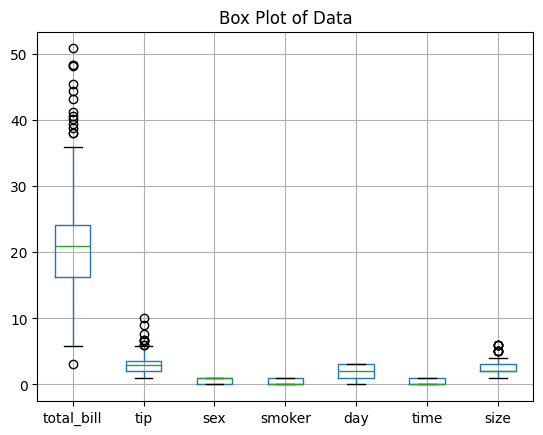

In [63]:


ds.boxplot()
plt.title('Box Plot of Data')
plt.show()

In [47]:
ds.drop(columns=['Unnamed: 0'], inplace=True)


In [64]:
ds

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.01,0,0,2,0,2
1,21.360195,1.66,1,0,2,0,3
2,21.010000,3.50,1,0,2,0,3
3,23.680000,3.31,1,0,2,0,2
4,24.590000,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.030000,5.92,1,0,1,0,3
240,27.180000,2.00,0,1,1,0,2
241,22.670000,2.00,1,1,1,0,2
242,17.820000,1.75,1,0,1,0,2


In [49]:
##standardization
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)

In [65]:
pd.DataFrame(ds_scaled)


,0,1,2,3,4,5,6
0,-0.538972,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,0.000000,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,-0.043189,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.286099,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.398329,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,0.945909,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383
240,0.717751,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193
241,0.161537,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193
242,-0.436609,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193


(array([ 87.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 157.]),
 array([-1.34335316, -1.2389652 , -1.13457725, -1.0301893 , -0.92580135,
        -0.82141339, -0.71702544, -0.61263749, -0.50824954, -0.40386159,
        -0.29947363, -0.19508568, -0.09069773,  0.01369022,  0.11807818,
         0.22246613,  0.32685408,  0.43124203,  0.53562998,  0.64001794,
         0.74440589]),
 <BarContainer object of 20 artists>)

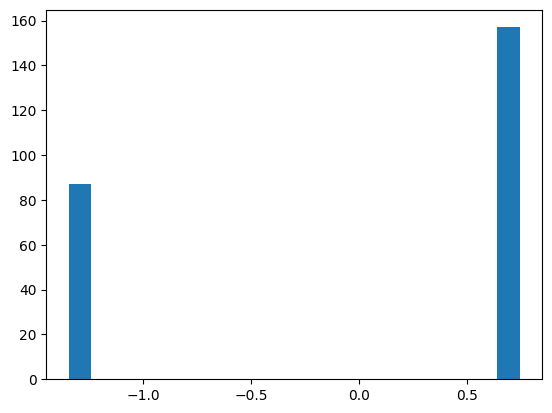

In [69]:
plt.hist(ds_scaled[:,2], bins = 20)
## all the rows and 2nd column 


In [67]:


min_max = MinMaxScaler()
ds_minmax = pd.DataFrame(min_max.fit_transform(ds), columns= ds.columns)
ds_minmax.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.383121,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6


(array([ 1.,  6., 10.,  0., 24., 37., 28., 62., 18., 13., 10.,  9.,  5.,
         7.,  3.,  4.,  1.,  2.,  3.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

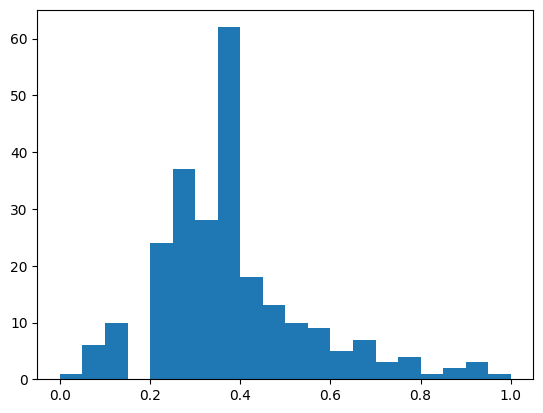

In [68]:
plt.hist(ds_minmax['total_bill'], bins = 20)


(array([151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

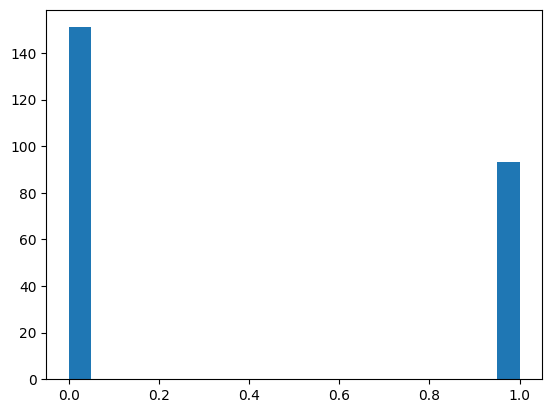

In [72]:
plt.hist(df_minmax['smoker'], bins = 20)


In [73]:
ds['tip_percentage'] = ds['tip'] / ds['total_bill'] * 100
average_tip_percentage = ds['tip_percentage'].mean()
print("Average tip percentage:", average_tip_percentage)

Average tip percentage: 14.855322162910602


In [74]:
ds

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.990000,1.01,0,0,2,0,2,5.944673
1,21.360195,1.66,1,0,2,0,3,7.771465
2,21.010000,3.50,1,0,2,0,3,16.658734
3,23.680000,3.31,1,0,2,0,2,13.978041
4,24.590000,3.61,0,0,2,0,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.030000,5.92,1,0,1,0,3,20.392697
240,27.180000,2.00,0,1,1,0,2,7.358352
241,22.670000,2.00,1,1,1,0,2,8.822232
242,17.820000,1.75,1,0,1,0,2,9.820426


In [75]:

ds['bill_type'] = 'Normal-bills'  # Initialize all values as 'Normal-bills'
ds.loc[(ds['total_bill'] > 10) & (ds['tip'] > 3), 'bill_type'] = 'Highest-bills-with-tips'

ds

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,bill_type
0,16.990000,1.01,0,0,2,0,2,5.944673,Normal-bills
1,21.360195,1.66,1,0,2,0,3,7.771465,Normal-bills
2,21.010000,3.50,1,0,2,0,3,16.658734,Highest-bills-with-tips
3,23.680000,3.31,1,0,2,0,2,13.978041,Highest-bills-with-tips
4,24.590000,3.61,0,0,2,0,4,14.680765,Highest-bills-with-tips
...,...,...,...,...,...,...,...,...,...
239,29.030000,5.92,1,0,1,0,3,20.392697,Highest-bills-with-tips
240,27.180000,2.00,0,1,1,0,2,7.358352,Normal-bills
241,22.670000,2.00,1,1,1,0,2,8.822232,Normal-bills
242,17.820000,1.75,1,0,1,0,2,9.820426,Normal-bills
